## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [917]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [918]:
url = "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv"
data = pd.read_csv(url)
print(data) # пять первых и последних строк + размер [1000 rows x 21 columns]

                                         status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
..                                          ...       ...   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    2799   
2    no credits taken/al

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [919]:
is_null = data.isnull().any().any() # isnull - есть ли пустые значения в ячейке. первый any() - есть ли пустые значения в строках, второй any() - если ли строки с пустым значением

print("Есть пропуски" if is_null else "Пропусков данных нет")


num_df = data._get_numeric_data() # проще всего вытащить количественные типы данных 
bin_df = pd.DataFrame() # таблица бинарных признаков

not_num_cols = set(data.columns) - set(num_df.columns) # нечисловые колонки

ord_cols = set(['installment_rate', 'number_credits', 'savings', 'employment_duration', 'present_residence', 'status']) # вручную определил порядковые колонки (с вывода из цикла ниже)

for col in not_num_cols:
    values = data[col].unique()
    if len(values) == 2:
        # здесь мы получаем колонку нулей и единиц, если признак содержит только два числа, где последний вариант соответствует единице
        bin_df[col] = pd.get_dummies(data[col])[values[1]] 
        # Это не универсальное решение, но в нашем случае признаки довольно хорошо разделяются: 
        # telephone ("yes" = 1)
        # people_liable (">=3" = 1)
        # credit_risk ("bad" = 1)
        # foreign_worker ("yes" = 1)
    # А этот код выводит мне значения в строках строк, чтобы я сам определил, какие порядковые, а какие категориальные
    # else:
    #     print(col, values)

bin_cols = set(bin_df.columns)
cat_cols = not_num_cols - bin_cols - ord_cols # выделили категориальные признаки 
cat_df = data[list(cat_cols)].copy() # создали массив категориальных признаков 
ord_df = data[list(ord_cols)].copy() # создали массив порядковых признаков 


Пропусков данных нет


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [920]:
print(data.groupby("purpose")["amount"].mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [921]:
age = data["age"]
rent = data["housing"] == "rent"
young = age < 30 
old = age > 40 
print(f"<30 снимают: {round(100 * (young & rent).sum() / young.sum(), 2)}%")
print(f">40 снимают: {round(100 * (old & rent).sum() / old.sum(), 2)}%")

<30 снимают: 66.67%
>40 снимают: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [922]:
credits = data["number_credits"]
foreign = bin_df['foreign_worker']

# print(data["number_credits"].unique()) # чтобы понять, какие варианты есть 
greater = ["4-5", ">= 6"] # нашим условиям соответствуют следующие значения number_credits
print("Число таких иностранцев:", (credits.isin(greater) & foreign).sum()) # количество пересечений иностранцев с группой кредитов в категориях из greater


Число таких иностранцев: 1


### Задание 6 (1 балл)

In [923]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

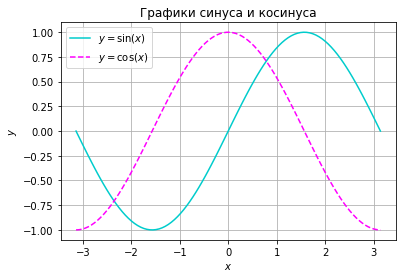

In [924]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label="$y = \sin(x)$", color=(0, 0.8, 0.8))
plt.plot(x, np.cos(x), "--", label="$y = \cos(x)$", color=(1, 0, 1))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Графики синуса и косинуса")

plt.legend()
plt.grid()
plt.show()


### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

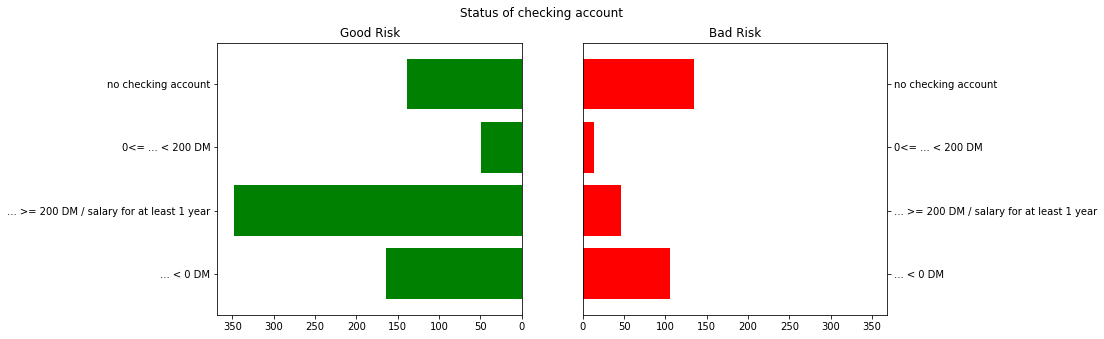

In [925]:
groups = data.groupby(["status", "credit_risk"]).agg(sum_risk=('credit_risk', "count"))["sum_risk"].reset_index()
limit = groups["sum_risk"].max() + 20 # ищем общее максимальное значение, чтобы задать одинаковый масштаб
ax = groups.pivot("status", "credit_risk", "sum_risk")[["good", "bad"]].plot(
    kind="barh", 
    subplots=True, layout=(1,2), figsize=(12, 5), width=0.8,
    xlim=[0, limit],
    color={"good": "green", "bad": "red"}, 
    legend=False, sharex=False, 
    title="Status of checking account", xlabel="")[0]
ax[0].set_title("Good Risk")
ax[1].set_title("Bad Risk")
ax[0].invert_xaxis() # инвертируем столбики 
ax[1].yaxis.tick_right() # инвертируем положение надписей

plt.show()


### Задание 8  (0.5 балла)

In [926]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

График поучилось построить значительно быстрее, а удобство зависит от того, какой формат сравнения нам нужен - общий или по группам (good, bad)


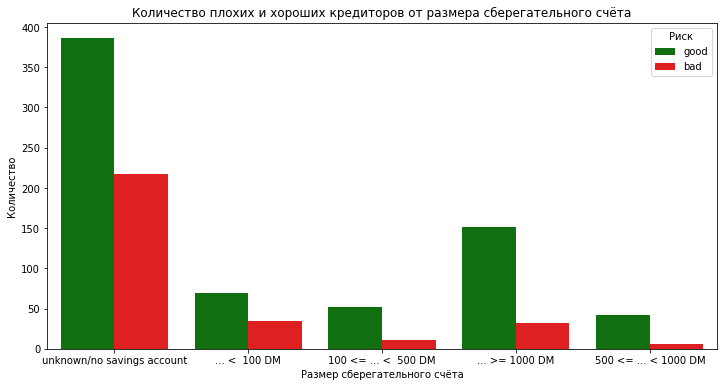

In [927]:
groups = data.groupby(["savings", "credit_risk"]).agg(sum_risk=('credit_risk', "count"))["sum_risk"].reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.barplot(
    data=groups, hue="credit_risk", x="savings", y="sum_risk", 
    order=['unknown/no savings account',  
           '... <  100 DM', '100 <= ... <  500 DM', 
           '... >= 1000 DM', '500 <= ... < 1000 DM'], # чтобы совпадать с примером, поменяем порядок отображения
    hue_order=["good", "bad"], palette=["green", "red"]) # и порядок столбцов тоже

plot.legend(title="Риск")
plot.set_xlabel("Размер сберегательного счёта")
plot.set_ylabel("Количество")
plot.set_title("Количество плохих и хороших кредиторов от размера сберегательного счёта")

print("График поучилось построить значительно быстрее, а удобство зависит от того, какой формат сравнения нам нужен - общий или по группам (good, bad)")

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Очень удобно строиться "график скрипки". Требуется только определиться с группировкой


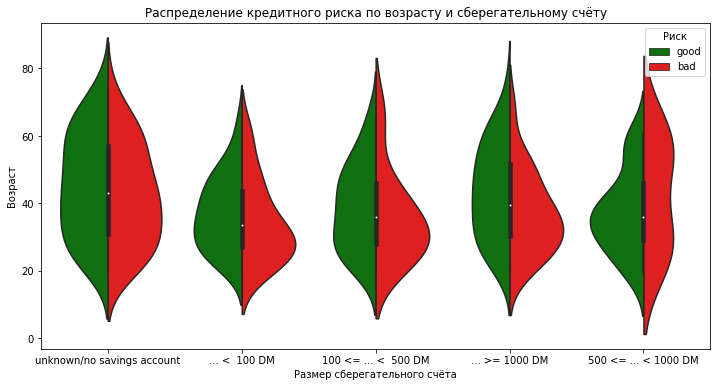

In [928]:
groups = data.groupby(["savings", "age", "credit_risk"]).agg(sum_risk=('credit_risk', "count"))["sum_risk"].reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
plot = sns.violinplot(
    data=groups, x="savings", y="age", hue="credit_risk", split="true",
    order=['unknown/no savings account',  
           '... <  100 DM', '100 <= ... <  500 DM', 
           '... >= 1000 DM', '500 <= ... < 1000 DM'],
    hue_order=["good", "bad"], palette=["green", "red"]
    );

plot.legend(title="Риск")
plot.set_ylabel("Возраст")
plot.set_xlabel("Размер сберегательного счёта")
plot.set_title("Распределение кредитного риска по возрасту и сберегательному счёту")

print('Очень удобно строиться "график скрипки". Требуется только определиться с группировкой')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

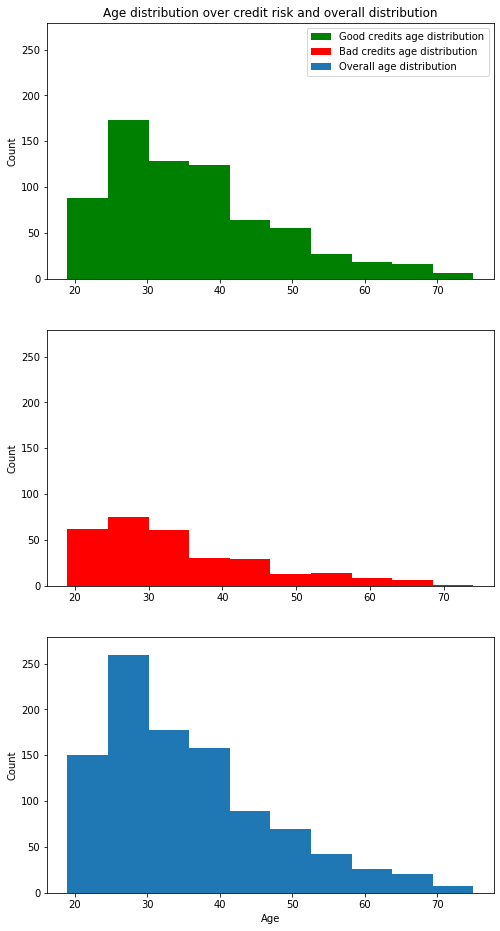

In [929]:
good = data["credit_risk"] == "good"
fig, ax = plt.subplots(3, 1, figsize=(8, 16))
values = ax[2].hist(data["age"], label="Overall age distribution")[0]
limit = values.max() + 20 # выбрали наибольшее по общему распределению, чтобы задать верхнюю границу графиков
plt.setp(ax, ylim=[0, limit], ylabel="Count") # Задаем общие свойства графиков

ax[0].hist(data[good]["age"], label="Good credits age distribution", color="green")
ax[1].hist(data[~good]["age"], label="Bad credits age distribution", color="red")
plt.xlabel("Age")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(i, []) for i in zip(*lines_labels)]
ax[0].legend(lines, labels, loc="upper right") # собираем все в одну легенду и отображаем на верхнем графике

ax[0].set_title("Age distribution over credit risk and overall distribution")
plt.show()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Можно удобно построить график распределения, тем не менее, это довольно быстро можно сделать и через Matplotlib
P.S. Я изначально думал, что все последующие задания надо обязательно делать через seaborn


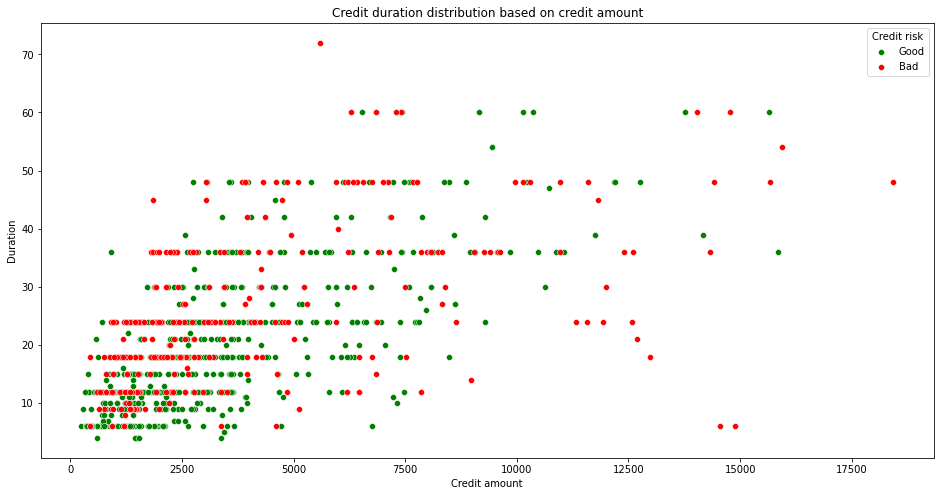

In [930]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=data[good], x="amount", y="duration", color="green", label="Good")
plot = sns.scatterplot(data=data[~good], x="amount", y="duration", color="red", label="Bad")
plot.set_xlabel("Credit amount")
plot.set_ylabel("Duration")
plot.legend(title="Credit risk")
plot.set_title("Credit duration distribution based on credit amount")

print("Можно удобно построить график распределения, тем не менее, это довольно быстро можно сделать и через Matplotlib")
print("P.S. Я изначально думал, что все последующие задания надо обязательно делать через seaborn")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

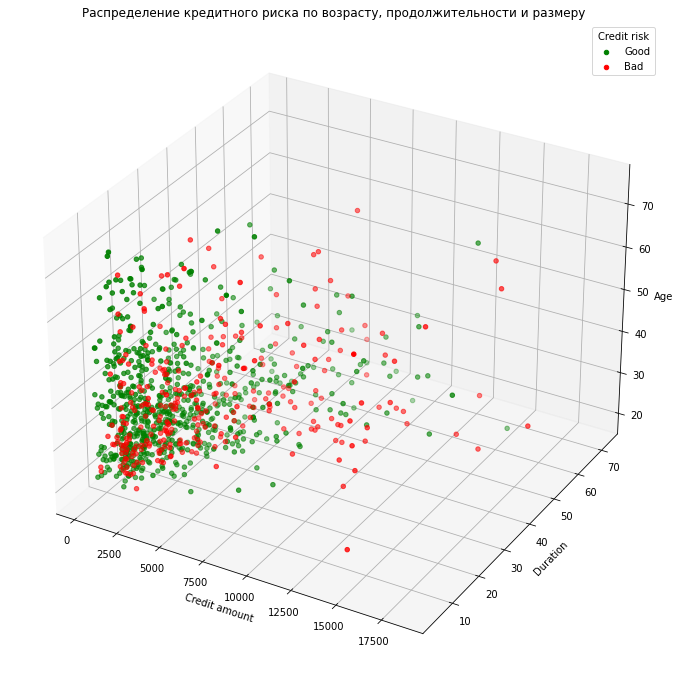

In [931]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data[good]["amount"], data[good]["duration"], data[good]["age"], color="green", label="Good")
ax.scatter(data[~good]["amount"], data[~good]["duration"], data[~good]["age"], color="red", label="Bad")
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.set_title("Распределение кредитного риска по возрасту, продолжительности и размеру")
ax.legend(title="Credit risk")
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [932]:
# Когда я разделял признаки, я уже уже представил бинарные в нужном виде: 
# print(bin_df)
# Я не знал, что это надо будет делать здесь, а сами бинарные признаки уже использовал в коде выше :(

# Порядковые признаки надо настраивать вручную, так как порядок обозначен неявно (хотя можно было бы просто присвоить число по индексу в data[col].unique())
# для себя вывел колонки в виде словаря: 
# for col in ord_cols:
#     print(f'"{col}" : [{",".join(ord_df[col].unique())}],')

# расставил все из вывода выше в нужном порядке 
orders = {
    "savings" : ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'],
    "installment_rate" : ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'],
    "employment_duration" : ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    "number_credits" : ['1', '2-3', '4-5', '>= 6'],
    "present_residence" : ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    "status" : ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
}

for key in orders:
    data[key].replace(orders[key], np.arange(0, len(orders[key])), inplace=True) # упорядочили категориальные 

data[bin_df.columns] = bin_df # присвоили наши новые бинарные признаки
data.drop(cat_df.columns, axis=1, inplace=True) # убираем полученные ранее категориальные признаки
 

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [997]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', axis=1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

std_value = np.std(X_train, axis=0) # отклонения значений для нормализации
mean_value = np.mean(X_train, axis=0) # средние значения для нормализации 
norm = lambda X: ((X.T - mean_value[:, None]) / std_value[:, None]).T # функция нормализации данных 
A = np.hstack([np.ones((X_train.shape[0], 1)), norm(X_train)]) # добавили массив единиц (который потом создаст нам bias для сдвига)
x = np.linalg.inv(A.T @ A) @ A.T @ y_train  # коэффициенты обученной гиперплоскости полученные методом намиеньших квадратов

def predict(Xtest: np.array) -> np.array:
    return np.round(np.hstack([np.ones((Xtest.shape[0], 1)), norm(Xtest)]) @ x) # умножаем коэффициенты гиперплоскости на массив, чтобы найти ответ

accuracy_score(y_test, predict(X_test))

0.692